In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Load pictures and labels:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def load_pictures(link):
    with open(link, 'rb') as f:
        f.read(16)
        buffer = f.read()
        pictures = np.frombuffer(buffer, dtype=np.uint8).reshape(-1, 28, 28)
    return pictures

def load_labels(link):
    with open(link, 'rb') as f:
        f.read(8)
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

train_images = load_pictures('/content/drive/MyDrive/MÁSTER/IC/P1/Train/train-images.idx3-ubyte')
train_labels = load_labels('/content/drive/MyDrive/MÁSTER/IC/P1/Train/train-labels.idx1-ubyte')

evaluation_images = load_pictures('/content/drive/MyDrive/MÁSTER/IC/P1/Evaluation/t10k-images.idx3-ubyte')
evaluation_labels = load_labels('/content/drive/MyDrive/MÁSTER/IC/P1/Evaluation/t10k-labels.idx1-ubyte')

train_images = train_images / 255.0
evaluation_images = evaluation_images / 255.0

In [3]:
# Neural network:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)

model = Sequential([
    Flatten(input_shape=(28, 28)), # Input layer
    Dense(128, activation='relu'), # Hidden layer
    Dense(10, activation='softmax') # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8732 - loss: 0.4555 - val_accuracy: 0.9570 - val_loss: 0.1588
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9587 - loss: 0.1408 - val_accuracy: 0.9647 - val_loss: 0.1209
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9732 - loss: 0.0908 - val_accuracy: 0.9674 - val_loss: 0.1033
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9786 - loss: 0.0693 - val_accuracy: 0.9722 - val_loss: 0.0928
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9859 - loss: 0.0490 - val_accuracy: 0.9717 - val_loss: 0.0929
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9884 - loss: 0.0399 - val_accuracy: 0.9719 - val_loss: 0.0905
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9918 - loss: 0.0292 - val_accuracy: 0.9729 - val_loss: 0.0959
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9926 - loss: 0.02

In [5]:
# Train set :
_, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

# Evaluation set:
_, evaluation_accuracy = model.evaluate(evaluation_images, to_categorical(evaluation_labels), verbose=0)
print(f"Evaluation Accuracy: {evaluation_accuracy * 100:.2f}%")

Train Accuracy: 99.30%
Evaluation Accuracy: 97.80%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


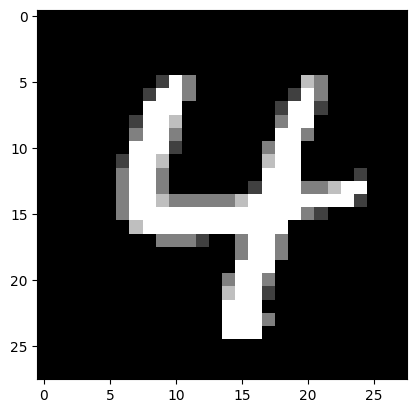

Predicted Label: 4
Actual Label: 4


In [ ]:
import random

def predict_random_image():
    random_index = random.randint(0, len(train_images) - 1)
    random_image = train_images[random_index]
    random_image = random_image.reshape(1, 28, 28)

    prediction = model.predict(random_image)
    predicted_label = np.argmax(prediction)

    plt.imshow(train_images[random_index], cmap='gray')
    plt.show()

    print(f"Predicted Label: {predicted_label}")
    print(f"Actual Label: {np.argmax(train_labels[random_index])}")

predict_random_image()